# THE SPARKS FOUNDATION INTERNSHIP #GRIPFEB21

#  Data Science & Business Analytics

#  PRESENTED BY : VIDYABHARRATHI N

##  TASK: Prediction using Supervised ML --Predict the percentage of a student based on the number of study hours.

#### Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.    Y = f(X)

##### IMPORTING REQUIRED LIBRARIES

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
print('LIBRARIES IMPORTED SUCCESSFULLY')

LIBRARIES IMPORTED SUCCESSFULLY


#####  READING THE DATA FROM ONLINE SOURCE

In [22]:
data=pd.read_csv('http://bit.ly/w-data')
print('Data imported successfully')


Data imported successfully


#####  Data Exploration

In [23]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [21]:
# Check if there any null value in the Dataset present
data.isnull == True

False

In [25]:
#checking for any missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [26]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [28]:
#checking the corellation between the hours and scores
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##### Data Visualization

######  Scatter plot

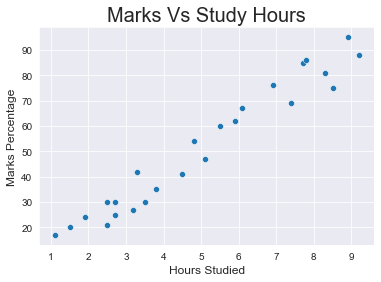

In [29]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

###### Line Plot

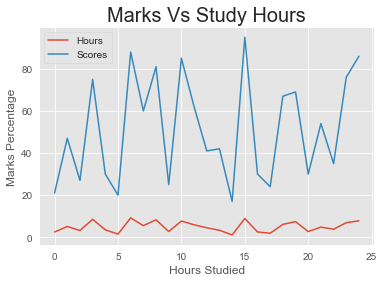

In [30]:
plt.style.use('ggplot')
data.plot(kind='line')
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

######  The Fit line over the data in single linear regression

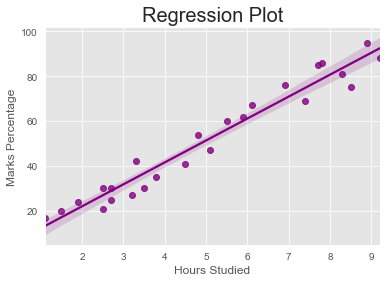

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [31]:
sns.regplot(x= data['Hours'], y= data['Scores'],color='purple')
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

In [33]:

# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [35]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("------Model Trained-----")

------Model Trained-----


In [36]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


######  Comparing Actual vs Predicted Marks

In [37]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


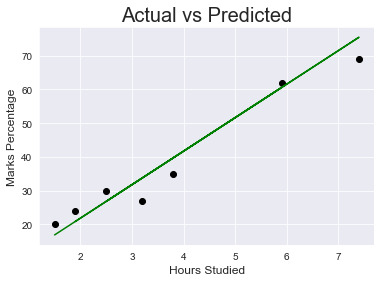

In [15]:
plt.scatter(x=val_X, y=val_y, color='black')
plt.plot(val_X, pred_y, color='green')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#####  the accuracy of the model

In [38]:
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


In [42]:
hours = [9.25]
answer = regression.predict([hours])
print("Predicted Score for 9.25 hours is = {}".format(round(answer[0],7)))

Predicted Score for 9.25 hours is = 93.8927289
